In [4]:
import time
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn import model_selection, preprocessing, svm
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import r2_score
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline 

import sys
sys.stdout.flush()

import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

from joblib import dump, load
import pickle
import os 
import shap
import importlib


In [5]:

def modelAlreadyTrain(filename):
    return os.path.isfile('../models/' + filename)

def savePickleModel(model, filename):
    with open('../models/' + filename, 'wb') as f:
        pickle.dump(model, f)
        f.close()

def loadPickleModel(filename):
    with open('../models/' + filename, 'rb') as f:
        model = pickle.load(f)
        f.close()
        return model

In [6]:
import os

# Obtenir le nombre de cœurs logiques
num_logical_cores = os.cpu_count()
print(f"Nombre de cœurs logiques : {num_logical_cores}")

Nombre de cœurs logiques : 48


## Récupération des données 


In [7]:
df = pd.read_csv(r'../Data/processed/Co2_final.csv', header=0)
display(df.head())



,ID,Mp,T,m (kg),Ewltp (g/km),W (mm),At1 (mm),ec (cm3),ep (KW),Fuel consumption,...,Ft_diesel/electric,Ft_e85,Ft_lpg,Ft_ng,Ft_petrol,Ft_petrol/electric,Fm_F,Fm_H,Fm_M,Fm_P
0,77074142,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,...,False,False,False,False,True,False,False,False,True,False
1,77074143,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,...,False,False,False,False,True,False,False,False,True,False
2,77074144,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,...,False,False,False,False,True,False,False,False,True,False
3,77074145,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,...,False,False,False,False,True,False,False,False,True,False
4,77074146,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,...,False,False,False,False,True,False,False,False,True,False


### Création des jeux de données d'entrainement et des jeux de données de test

In [8]:

X = df.drop(columns=['Ewltp (g/km)', 'ID'])
y = df['Ewltp (g/km)']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
import tpot
from tpot import TPOTRegressor


# Personnalisation des opérateurs et des paramètres de TPOT

In [12]:
start_time = time.time()
tpot = TPOTRegressor(generations=4, # Nombre d’itérations du processus d’optimisation du pipeline d’exécution
                        population_size=20, # Nombre d’individus à conserver dans la population de programmation génétique à chaque génération
                        verbosity=3, # La quantité d’informations que TPOT communique pendant son exécution
                        random_state=42, n_jobs=-1)
    # Fin du chronométrage
end_time = time.time()
    # Calcul du temps écoulé
elapsed_time = end_time - start_time
print(f"Temps d'exécution  : {elapsed_time} secondes")

Temps d'exécution  : 6.723403930664062e-05 secondes


In [13]:
start_time = time.time()
tpot.fit(X_train, y_train)
    # Fin du chronométrage
end_time = time.time()
    # Calcul du temps écoulé
elapsed_time = end_time - start_time
print(f"Temps d'exécution  : {elapsed_time} secondes")

30 operators have been imported by TPOT.


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]

Skipped pipeline #2 due to time out. Continuing to the next pipeline.
Skipped pipeline #4 due to time out. Continuing to the next pipeline.
Skipped pipeline #6 due to time out. Continuing to the next pipeline.
Skipped pipeline #8 due to time out. Continuing to the next pipeline.
Skipped pipeline #13 due to time out. Continuing to the next pipeline.
Skipped pipeline #15 due to time out. Continuing to the next pipeline.
Skipped pipeline #17 due to time out. Continuing to the next pipeline.
Skipped pipeline #20 due to time out. Continuing to the next pipeline.
Skipped pipeline #28 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by AdaBoostRegressor..
_pre_test decorator: _random_mutation_operator: num_test=1 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by AdaBoostRegressor..
_pre_test decorator: _mate_operator: num_te

In [14]:
from sklearn.metrics import r2_score
start_time = time.time()
# Prédire les étiquettes des données de test
y_pred = tpot.predict(X_test)

# Calculer et afficher le score R²
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2}")
    # Fin du chronométrage
end_time = time.time()
    # Calcul du temps écoulé
elapsed_time = end_time - start_time
print(f"Temps d'exécution  : {elapsed_time} secondes")

R² score: 0.9996235047814093
Temps d'exécution  : 2.1639609336853027 secondes


In [15]:
# Obtenir le meilleur modèle trouvé par TPOT
best_model = tpot.fitted_pipeline_

# Évaluer le meilleur modèle sur les données de test
test_score = best_model.score(X_test, y_test)

print("Best score sur le train :", tpot.score(X_train, y_train))
print("Best modèle :", best_model)
print("Score sur le test :", test_score)

Best score sur le train : -0.6500020012862436
Best modèle : Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=1.0,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None, min_child_weight=15,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None,

### Exporter le pipeline optimisé en code Python

In [16]:
# Exporter le pipeline optimisé en code Python
tpot.export('tpot_regressor_pipeline.py')

### Trace des modèles testés par TPOT

In [17]:
# Accéder aux résultats de tous les modèles testés
resultats = tpot.evaluated_individuals_
for pipeline, score in resultats.items():
    print(f"Pipeline: {pipeline}, Score: {score}")

Pipeline: RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=11, RandomForestRegressor__min_samples_split=9, RandomForestRegressor__n_estimators=100), Score: {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -inf}
Pipeline: RandomForestRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.75, ElasticNetCV__tol=0.01), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.4, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=14, RandomForestRegressor__n_estimators=100), Score: {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}
Pipeline: AdaBoostRegressor(input_matrix, AdaBoostRegressor__learning_rate=1.0, AdaBoostRegressor__loss=exponential, AdaB

# Creation d'une classe TpotRegressorModel pour sortir les graphes et les métriques

In [25]:

class TpotRegressorModel:
    
    def __init__(self, name, model, X_train, X_test, y_train, y_test, columns):
        self.name = name
        self.model = model
        self.X_train = X_train 
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.columns = columns

    @staticmethod
    def root_mean_squared_error(y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred) ** 2))

    def predictModel(self):
        self.y_pred_train = self.model.predict(self.X_train)
        self.y_pred_test = self.model.predict(self.X_test)
    
    def calcScore(self):
        self.mse_train = TpotRegressorModel.root_mean_squared_error(self.y_train, self.y_pred_train)
        self.mse_test = TpotRegressorModel.root_mean_squared_error(self.y_test, self.y_pred_test)
        self.r2_train = self.model.score(self.X_train, self.y_train)
        self.r2_test = self.model.score(self.X_test, self.y_test)

    def displayScore(self):
        print(f'RMSE Jeux d entrainement : {self.mse_train}')
        print(f'RMSE Jeux de test : {self.mse_test}')
        print(f'Score du modèle train (R²) {self.r2_train}')
        print(f'Score du modèle test (R²) {self.r2_test}')

    def writeResults(self):
        if os.path.isfile('../models/tpot_regressions_results.csv'):
            results = pd.read_csv('../models/tpot_regressions_results.csv', sep=";",index_col=0)
        else :
            results = pd.DataFrame(columns=["MODELE", "RMSE Train", "RMSE Test", "R² Train", "R² Test"])

        if self.name in results['MODELE'].values:
            results.loc[results['MODELE'] == self.name, ['RMSE Train', 'RMSE Test', 'R² Train', 'R² Test']] = [self.mse_train, self.mse_test, self.r2_train, self.r2_test]
        else:
            new_row = { "MODELE": self.name,
                        "RMSE Train": self.mse_train,
                        "RMSE Test": self.mse_test,
                        "R² Train": self.r2_train,
                        "R² Test": self.r2_test}
            results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

        results.to_csv('../models/tpot_regressions_results.csv', sep=';')

    def displayGraphResultVsReel(self):
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,1)
        plt.scatter(self.y_train, self.y_pred_train)
        _axemax = self.y_train.max()
        _axemin = self.y_train.min()
        plt.plot([_axemin, _axemax], [_axemin, _axemax], 'k--', lw=2,)
        plt.xlabel('Valeurs réelles')
        plt.ylabel('Valeurs prédites')
        plt.title("Jeux d'entrainement")

        plt.subplot(1,2,2)
        plt.scatter(self.y_test, self.y_pred_test)
        _axemax = self.y_test.max()
        _axemin = self.y_test.min()
        plt.plot([_axemin, _axemax], [_axemin, _axemax], 'k--', lw=2,)
        plt.xlabel('Valeurs réelles')
        plt.ylabel('Valeurs prédites')
        plt.title('Jeux de test')
        plt.show();

    def displayDistributionOfResidue(self, yScaleInLog):
        y_pred_test_serie = pd.Series(self.y_pred_test)
        y_pred_test_serie.index = self.y_test.index
        y_residu = self.y_test-y_pred_test_serie
        plt.hist(y_residu, bins=100, edgecolor='black', alpha=0.7)
        if yScaleInLog:
            plt.yscale('log')
        plt.title("Distribution des résidus")
        plt.xlabel("Résidus")
        plt.ylabel("Fréquence")
        plt.show();


### Résultats du meilleur modèle proposé par TPOT


In [26]:
Model = TpotRegressorModel('TPotRegressor', 
                          best_model, 
                          X_train, 
                          X_test, 
                          y_train, 
                          y_test, 
                          X.columns)



In [27]:
Model.predictModel()

> Affichage des métriques RMSE et R²

In [28]:
Model.calcScore()

In [29]:
Model.displayScore()

RMSE Jeux d entrainement : 0.80622701597394
RMSE Jeux de test : 0.9112826638846524
Score du modèle train (R²) 0.9997060727195557
Score du modèle test (R²) 0.9996235047814093


### Représentation graphique des résultats du modèle
> Affichage graphique des résultats en représentant sur l'axe y les valeurs prédites et sur l'axe x la valeur rééle
>
> Plus les résultats sont concentrés sur la diagonale plus le modèle est performant

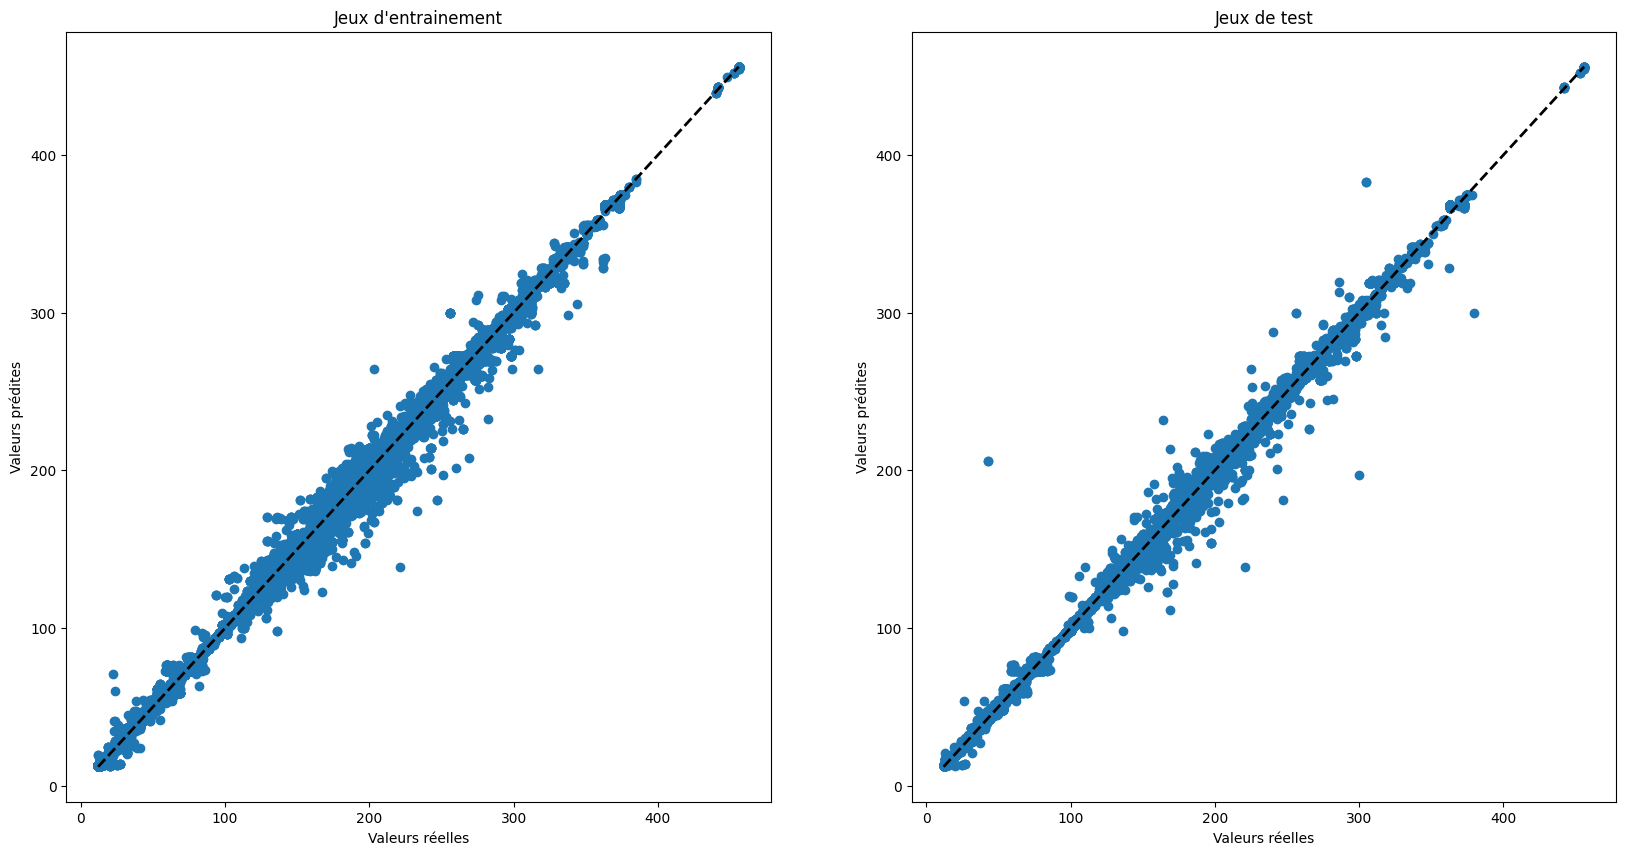

In [30]:
Model.displayGraphResultVsReel()

> Affichage de la distribution de la différence entre la valeur prédite et la valeur réele
>
> Plus la distribution est centrée sur zéro et plus le modèle est performant

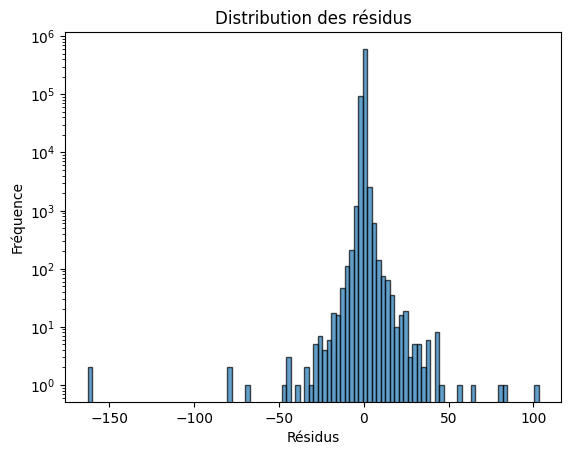

In [31]:
Model.displayDistributionOfResidue(True)